## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LOADING AND PERFORMING EDA ON THE DATA 

In [12]:
datasms = pd.read_csv("C:/Users/ASUS/Desktop/spam.csv" ,encoding='latin-1' )

In [13]:
datasms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
datasms.rename(columns = {'v1':'Label','v2':'Feature'}, inplace = True)

In [15]:
datasms.head()

,Label,Feature,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
datasms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

,Label,Feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
datasms.shape

(5572, 5)

In [18]:
datasms['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

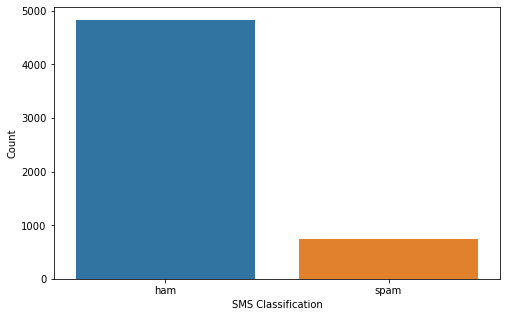

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Label', data=datasms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

## CLEANING THE FEATURES

In [21]:
corpus = []
ps = PorterStemmer()

for i in range(0,datasms.shape[0]):
    Feature = re.sub(pattern='[^a-zA-Z]', repl=' ', string=datasms.Feature[i]) #Cleaning special character from the message
    Feature = Feature.lower() #Converting the entire message into lower case
    words = Feature.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    Feature = ' '.join(words) #Joining the stemmed words
    corpus.append(Feature) #Building a corpus of messages

### SPLITTING THE DATASET FOER TRAINING AND TESTING

In [23]:
from sklearn.preprocessing import LabelEncoder

feature=datasms.iloc[:,[1]]['Feature']
label=datasms.iloc[:,[0]]['Label']


In [24]:
le=LabelEncoder()
label=le.fit_transform(label)

In [25]:
label

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=5000)
features=cv.fit_transform(corpus)

features=features.toarray()

In [28]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.2,random_state=7)

## APPLYING ALGORITHMS

### 1) NAIVE BAYIES

In [30]:

from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(features_train,label_train)

MultinomialNB()

In [31]:
label_pred=model.predict(features_test)
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
import sklearn.metrics as m

In [34]:

m.accuracy_score(label_test,label_pred)*100

98.65470852017937

In [35]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.93      0.97      0.95       145

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [36]:
print(m.confusion_matrix(label_test,label_pred))

[[960  10]
 [  5 140]]


### 2) LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(features_train,label_train)

LogisticRegression()

In [38]:
label_pred=model1.predict(features_test)

In [39]:
m.accuracy_score(label_test,label_pred)

0.9865470852017937

In [40]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.99      0.90      0.95       145

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [43]:
print(m.confusion_matrix(label_test,label_pred))

[[969   1]
 [ 14 131]]


#### PREDICTION OF THE SMS FAKE OR NOT (USING LOGISTIC REGRESSION)

In [44]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return model1.predict(temp)

In [45]:
result = ['It is am SPAM!!!, Please be Alert','This is a normal message, No Need to Worry.']

In [46]:
msg = "Yup... Ok i go home look at the timings then i msg Ì_ again... Xuhui going to learn on 2nd may too but her lesson is at 8am"

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

This is a normal message, No Need to Worry.


In [47]:
msg = "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+"

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

It is am SPAM!!!, Please be Alert
